In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [5]:
df = pd.read_csv(r'/Users/arshita/Documents/Machine learning/Case Study 3 Cereal/cereal.csv')
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [4]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [5]:
df.corr(numeric_only = True)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356,0.097234,0.696091,0.087200,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335,0.133865,0.216158,-0.244469,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156,0.263691,0.214625,-0.175892,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477,-0.069719,0.308576,0.119665,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243,0.297539,0.247226,-0.513061,0.584160
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148,-0.101790,0.135136,0.363932,0.052055
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137,0.100438,0.450648,-0.032358,-0.759675
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699,0.360663,0.416303,-0.495195,0.380165
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000,0.299262,0.320324,0.128405,-0.240544
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.101790,0.100438,0.360663,0.299262,1.000000,0.190762,-0.335269,0.025159


<Axes: >

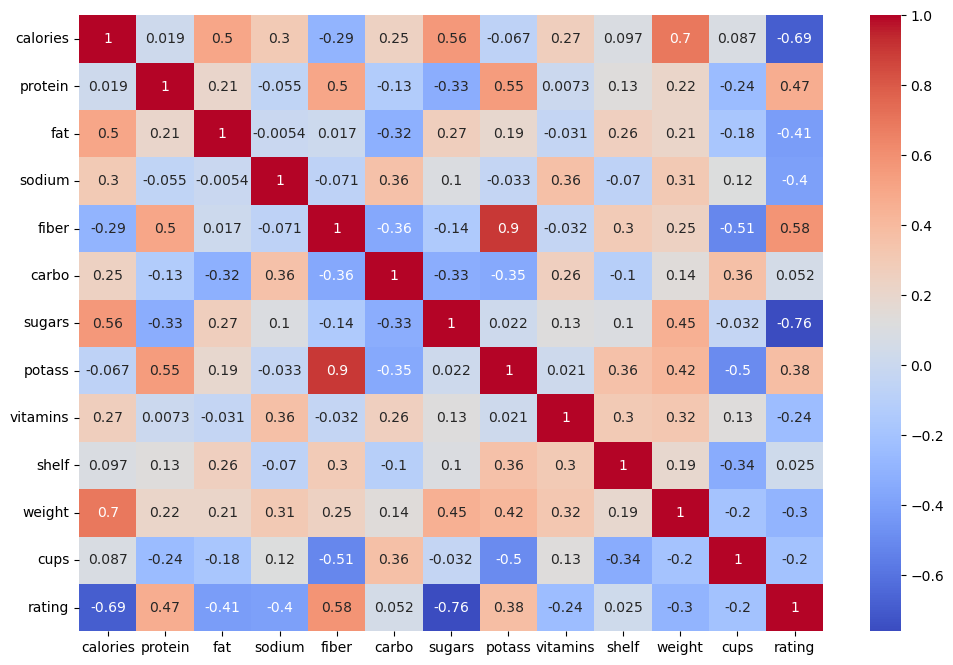

In [6]:
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(numeric_only = True), cmap = 'coolwarm', annot = True)

<Axes: xlabel='calories', ylabel='rating'>

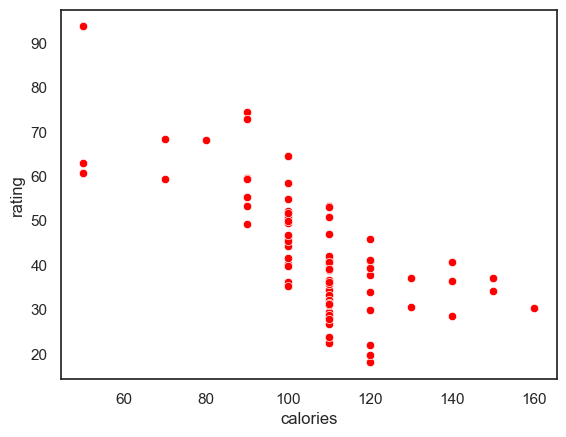

In [7]:
sns.set(style = 'white')
sns.scatterplot(x = "calories", y = "rating", data = df, color = 'red')

<Axes: xlabel='mfr', ylabel='rating'>

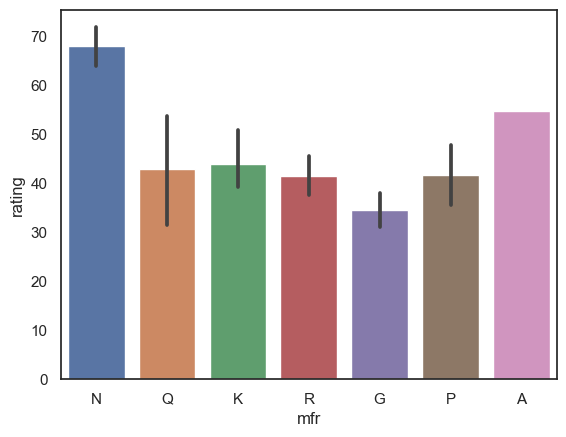

In [8]:
sns.barplot(x = "mfr", y = "rating", data = df)

<Axes: xlabel='type', ylabel='rating'>

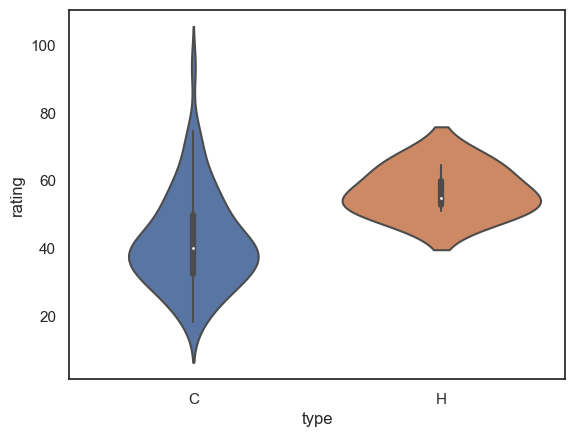

In [9]:
sns.violinplot(x = "type", y = "rating", data = df)
#A violin plot is used to visualize the distribution of a dataset and its probability density.

<Axes: xlabel='sodium', ylabel='sugars'>

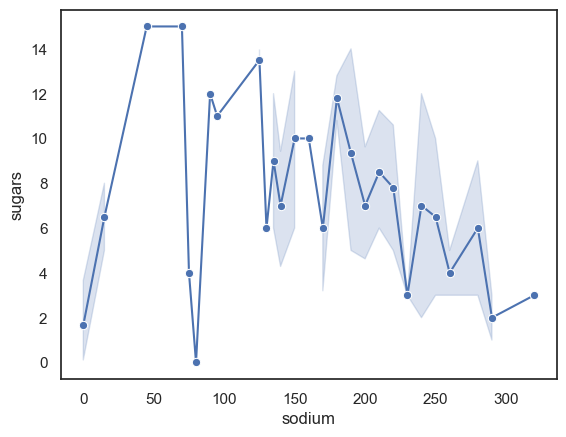

In [10]:
sns.lineplot(x = "sodium", y = "sugars", data = df, marker = "o")

<Axes: xlabel='shelf', ylabel='count'>

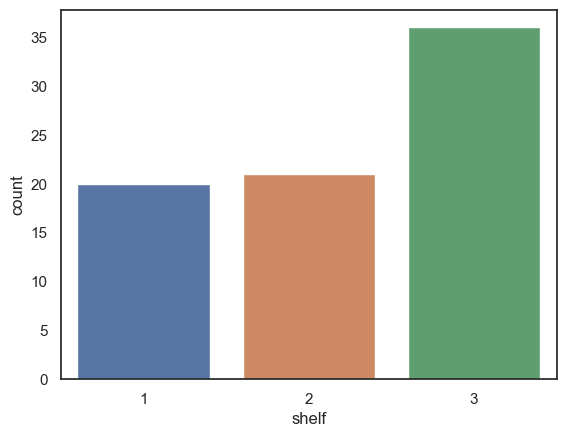

In [11]:
sns.countplot(x = "shelf", data = df)

## Questions

Text(0.5, 1.0, 'Histogram of Sugar Content')

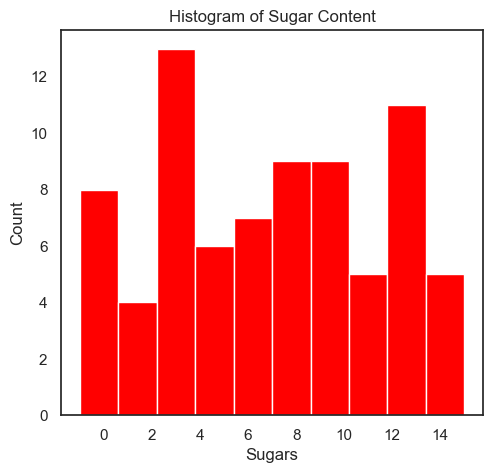

In [12]:
# 1. Plot histograms of sugar and vitamin content
plt.figure(figsize = (12,5))
plt.subplot(1, 2, 1)
plt.hist(df["sugars"], bins = 10, color = 'red')
plt.xlabel("Sugars")
plt.ylabel("Count")
plt.title("Histogram of Sugar Content")

Text(0.5, 1.0, 'Histogram of Vitamin Content')

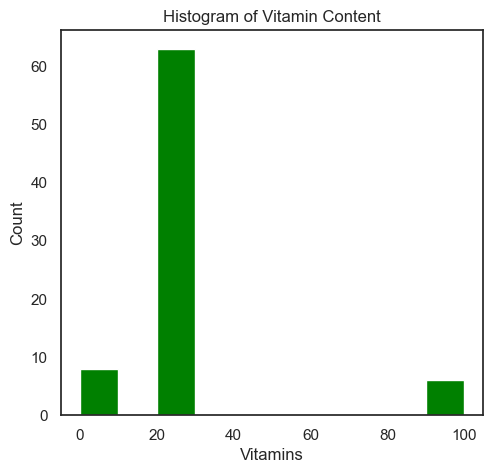

In [13]:
plt.figure(figsize = (12,5))
plt.subplot(1, 2, 1)
plt.hist(df["vitamins"], bins = 10, color = 'green')
plt.xlabel("Vitamins")
plt.ylabel("Count")
plt.title("Histogram of Vitamin Content")

In [14]:
# 2. Replace manufacturer codes with full names
manufacturer_mapping = {
    'N': 'Nabisco', 
    'Q': 'Quaker Oats', 
    'K': 'Kelloggs', 
    'R': 'Raslston Purina', 
    'G': 'General Mills', 
    'P': 'Post', 
    'A': 'American Home Foods Products'
}
df["manufacturer"] = df["mfr"].map(manufacturer_mapping)

In [15]:
df["mfr"]

0     N
1     Q
2     K
3     K
4     R
     ..
72    G
73    G
74    R
75    G
76    G
Name: mfr, Length: 77, dtype: object

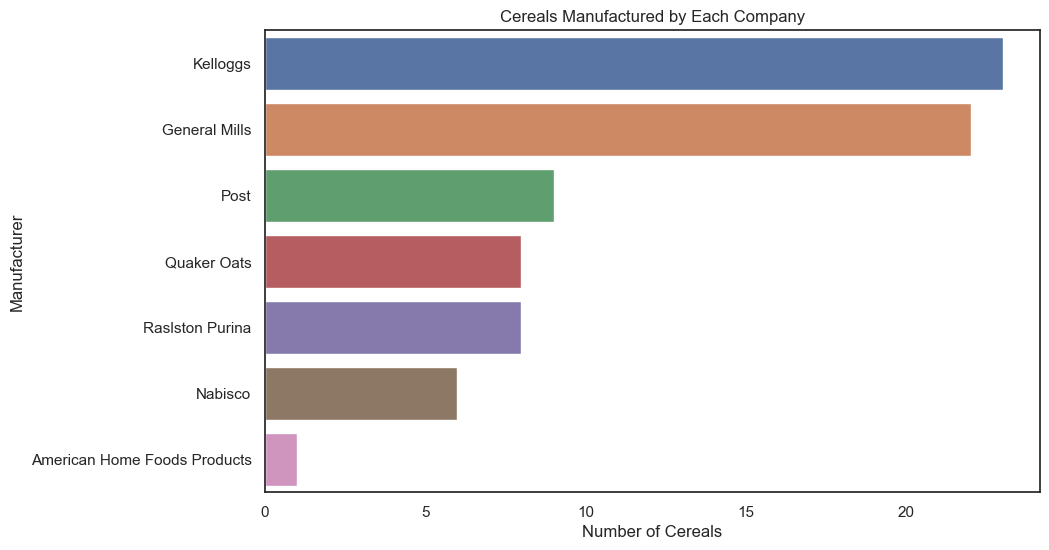

In [16]:
# Bar plot of cereals per manufacturer
plt.figure(figsize = (10, 6))
sns.countplot(y = df["manufacturer"], order = df
              ["manufacturer"].value_counts().index)
plt.xlabel("Number of Cereals")
plt.ylabel("Manufacturer")
plt.title("Cereals Manufactured by Each Company")
plt.show()

In [25]:
#Extract the rating as your target variable ‘y’ 
#and all numerical parameters as your predictors ‘x’. Separate 25% of your data as test set

X = df.iloc[:,3:15]
Y = df['rating']

In [27]:
X

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...
72,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75
73,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00
74,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67
75,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00


In [28]:
Y

0     68.402973
1     33.983679
2     59.425505
3     93.704912
4     34.384843
        ...    
72    39.106174
73    27.753301
74    49.787445
75    51.592193
76    36.187559
Name: rating, Length: 77, dtype: float64

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 10)

In [30]:
#Fit a linear regression module and measure the mean squared error on test dataset. 
lin_model = LinearRegression()
lin_model.fit(pd.DataFrame(x_train), y_train)

LinearRegression()

In [31]:
predicted_value = lin_model.predict(pd.DataFrame(x_test))

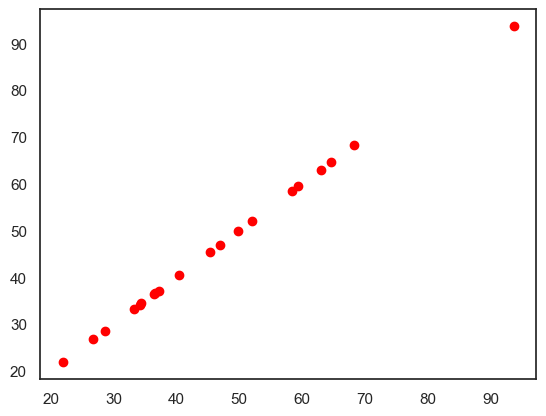

In [32]:
plt.scatter(predicted_value, y_test, color = 'red')
plt.show()

In [33]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predicted_value)
mse

1.4402074134530253e-13

In [36]:
# Calculate Root Mean Square Error (RMSE)
rmse = np.sqrt(mse)
rmse

3.795006473582127e-07

In [39]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predicted_value)
mae

3.366060903786661e-07